# Data play

This is a simple example on how to use (_still largely incomplete!_) GRANDlib classes for analysis-oriented data readout.

First, let's generate a ROOT file with random, dummy events. The old file will be cleared if exists. This uses an example script examples/io/DataStoringExample.py. Please be sure to restart kernel each time you try this script.


In [1]:
import os.path

if os.path.isfile("dummy_data.root"):
    os.remove("dummy_data.root")
%run ../io/DataStoringExample.py dummy_data.root

Wrote trun
Wrote tadccounts
Wrote tvoltage
Wrote tefield
Finished writing file dummy_data.root


Now we import the necessary python modules

In [2]:
import sys
import os
from grand.grandlib_classes.grandlib_classes import *

Let's create an Event, and provide the file name, run and event numbers (which we know to exist) for it

In [3]:
e = Event()
e.file = "dummy_data.root"
e.run_number = 0
e.event_number = 0

The Event has to be told to initialise its contents from the provided file, with provided run and event numbers

In [4]:
e.fill_event_from_trees()

dummy_data.root


Let's print a Run property (constant for the whole run) - the data source. The default value is "other". So if it prints out different, we know that it has been initailised from TTrees:

In [5]:
print(e.data_source)

detector


How many traces do we have in this event?

In [6]:
print(len(e.voltages))

4


What are the contents of the first trace X?

In [7]:
print(e.voltages[0].trace_x)

{ -0.000219727f, 0.00142822f, 0.00219727f, 0.000878906f, 0.000329590f, -0.000219727f, 0.000549316f, 0.00175781f, -0.000769043f, -0.00164795f, -0.000988770f, -0.00109863f, 0.000439453f, -0.000659180f, -0.00120850f, -0.000219727f, -0.000988770f, -0.00197754f, -0.000769043f, 0.000769043f, -0.000549316f, 0.00120850f, 0.00219727f, 0.000659180f, -0.000878906f, -0.000549316f, 0.000109863f, -0.00175781f, 0.00186768f, -0.00219727f, 0.000439453f, -0.00175781f, 0.00131836f, -0.000878906f, 0.00131836f, 0.00131836f, 0.00208740f, 0.000988770f, -0.00186768f, -0.00131836f, 0.000878906f, -0.000769043f, 0.00109863f, 0.00219727f, 0.00142822f, 0.00153809f, 0.000988770f, -0.000659180f, -0.000769043f, 0.000219727f, 0.000878906f, 0.00175781f, 0.00000f, 0.000109863f, 0.000109863f, 0.00175781f, -0.00197754f, -0.000109863f, -0.00208740f, -0.000109863f, 0.000549316f, -0.000659180f, -0.00175781f, 0.00109863f, 0.00186768f, 0.000329590f, -0.000549316f, -0.00164795f, -0.00153809f, 0.00197754f, 0.000439453f, 0.001977

Let's draw it with ROOT:

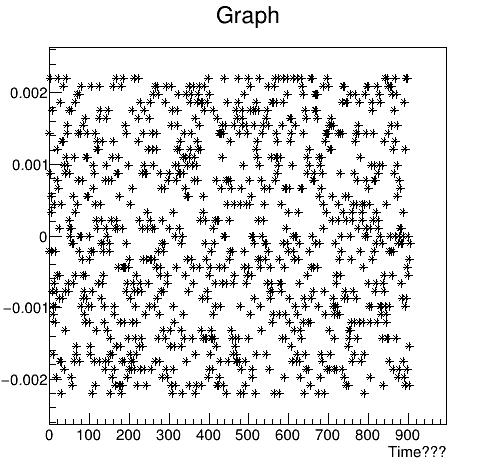

In [8]:
import ROOT
c = ROOT.TCanvas("c", "c", 500, 500)
trace_len = len(e.voltages[0].trace_x)
g = ROOT.TGraph(trace_len, np.arange(trace_len).astype(np.float64), np.array(e.voltages[0].trace_x).astype(np.float64))
g.GetXaxis().SetTitle("Time???")
g.GetYaxis().SetTitle("Voltage [V]")
g.Draw("A*")
c.Draw()